# Exchange Rates - Storytelling With Data Visualization

We're going to analyze a dataset about the Euro daily exchange rates between 2000 and 2022 💶. The euro (symbolized with €) is the official currency in most of the countries of the European Union. [More informations here](https://en.wikipedia.org/wiki/Euro).

*Daria Chemkaeva* put together the data set and made it available on [Kaggle](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020) — the data source is the European Central Bank. Note that the dataset gets regular updates — I've downloaded it on <u>April 2022</u>.

### Project Goal

To visually and clearly show the evolution of the Euro quotation against the Real over time, correlating with the Brazilian presidents.

### Important informations about the dataset

Reference rates are euro foreign exchange rates observed on major foreign exchange trading venues at a certain point in time = they are the price of one currency in terms of another currency. The rates are usually updated around 16:00 CET on every working day, except on TARGET closing days.

Dataset contains date and Euro rate corresponding to Australian dollar, Bulgarian lev, Brazilian real, Canadian dollar, Swiss franc, Chinese yuan renminbi, Cypriot pound, Czech koruna, Danish krone, Estonian kroon, UK pound sterling, Greek drachma, Hong Kong dollar, Croatian kuna, Hungarian forint, Indonesian rupiah, Israeli shekel, Indian rupee, Iceland krona, Japanese yen, Korean won, Lithuanian litas, Latvian lats, Maltese lira, Mexican peso, Malaysian ringgit, Norwegian krone, New Zealand dollar, Philippine peso, Polish zloty, Romanian leu, Russian rouble, Swedish krona, Singapore dollar, Slovenian tolar, Slovak koruna, Thai baht, Turkish lira, US dollar, South African rand.

Some currency in the list doesn't exist anymore; it was replaced by the Euro €: Cypriot pound (2007), Estonian kroon (2011), Greek drachma (2002), Lithuanian litas (2015), Latvian lats (2014), Maltese lira (2008), Slovenian tolar (2007), Slovak koruna (2009).
Bulgarian lev since 2002 is pegged to the Euro: 1 € = 1.9558 leva.

### 1. Importing libraries and reading file

Lets start importing pandas, matplotlib and taking a first look in the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
# Enables Jupyter to display graphs

exchange_rates = pd.read_csv('C:/Users/Daniel Mendes/Projects/Databases/euro-daily-hist_1999_2022.csv')
exchange_rates.info()
exchange_rates.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6022 entries, 0 to 6021
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6022 non-null   object 
 1   [Australian dollar ]      6022 non-null   object 
 2   [Bulgarian lev ]          5620 non-null   object 
 3   [Brazilian real ]         5754 non-null   object 
 4   [Canadian dollar ]        6022 non-null   object 
 5   [Swiss franc ]            6022 non-null   object 
 6   [Chinese yuan renminbi ]  5754 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6022 non-null   object 
 9   [Danish krone ]           6022 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6022 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6022 non-null   object 
 14  [Croatia

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2022-04-08,1.4552,1.9558,5.1583,1.3675,1.0155,6.9115,NaN,24.479,7.4372,...,4.9425,NaN,10.2768,1.4801,NaN,NaN,36.4880,16.0237,1.0861,15.9968
1,2022-04-07,1.4578,1.9558,5.1460,1.3704,1.0185,6.9448,NaN,24.512,7.4378,...,4.9419,NaN,10.3130,1.4848,NaN,NaN,36.5410,16.0929,1.0916,16.0520
2,2022-04-06,1.4431,1.9558,5.0996,1.3647,1.0187,6.9498,NaN,24.441,7.4378,...,4.9433,NaN,10.2855,1.4844,NaN,NaN,36.7010,16.0998,1.0923,15.9934
3,2022-04-05,1.4374,1.9558,5.0384,1.3647,1.0141,6.9783,NaN,24.338,7.4378,...,4.9438,NaN,10.2593,1.4867,NaN,NaN,36.6970,16.1500,1.0969,15.9529
4,2022-04-04,1.4651,1.9558,5.1162,1.3749,1.0203,7.0026,NaN,24.320,7.4385,...,4.9432,NaN,10.3849,1.4938,NaN,NaN,36.8940,16.1830,1.1005,16.0957


### Observations

Before we start creating data visualizations, we'll need to do a bit of data cleaning.
- Change columns names to more padronized strings;
- Change Period\Unit type to datetime;
- Given that there is many missing values and it changes so much depending of the currency, we can't just remove all missing rows, because in that case we would limit the analysis a lot and drastically reduce the number of rows, removing a lot of good data from other currencies. We need to separate only columns that we want to use for the study, and after that remove unwanted rows. In this case we will analyse brazilian real with 5.754 non missing values.

### 2. Data Cleaning
Lets start our data preparation before the analysis.

In [2]:
exchange_rates.columns = exchange_rates.columns.str.replace(' ]','',regex=True).str.replace('[','',regex=True).str.lower().str.replace(' ','_',regex=True)
exchange_rates.rename(columns={'period\\unit:': 'time'}, inplace=True)
exchange_rates['time'] = pd.to_datetime(exchange_rates['time'])
exchange_rates.sort_values('time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
exchange_rates.head()

,time,australian_dollar,bulgarian_lev,brazilian_real,canadian_dollar,swiss_franc,chinese_yuan_renminbi,cypriot_pound,czech_koruna,danish_krone,...,romanian_leu,russian_rouble,swedish_krona,singapore_dollar,slovenian_tolar,slovak_koruna,thai_baht,turkish_lira,us_dollar,south_african_rand
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


Now lets separate only our `brazilian_real` data, the one that we want to deepdive.

In [3]:
euro_to_real = exchange_rates[['time', 'brazilian_real']].copy()
euro_to_real['brazilian_real'].value_counts()

-         61
2.7570     4
3.3277     4
3.0909     4
3.3232     4
          ..
2.6879     1
2.6841     1
2.6960     1
2.6905     1
5.1583     1
Name: brazilian_real, Length: 5167, dtype: int64

We can notice that we have 61 '-' characters, so we need to remove those before turning the column to float type.

In [4]:
euro_to_real = euro_to_real[euro_to_real['brazilian_real'] != '-']
euro_to_real['brazilian_real'] = euro_to_real['brazilian_real'].astype(float)
euro_to_real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5961 entries, 0 to 6021
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   time            5961 non-null   datetime64[ns]
 1   brazilian_real  5693 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 139.7 KB


### 3. Data analysis
Let's use matplotlib to look at the chart of the Real against the Euro and visualize the data we have.

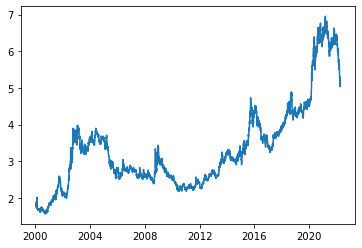

In [5]:
plt.plot(euro_to_real['time'],euro_to_real['brazilian_real'])
plt.show()

As our database has daily quote information and we are looking at a 22 year window, our line chart is very granular.

We can smooth out the movements by calculating and showing an 'x' period moving average, let's calculate the moving average below.

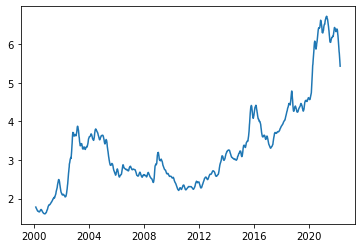

In [6]:
euro_to_real['rolling_mean'] = euro_to_real['brazilian_real'].rolling(30).mean()
euro_to_real.tail()
plt.plot(euro_to_real['time'],euro_to_real['rolling_mean'])
plt.show()

Let's now add a year column to make it easier to identify the presidents, in addition to creating the column with the presidents itself.

In [7]:
euro_to_real['year'] = euro_to_real['time'].dt.year
euro_to_real.loc[euro_to_real['year'] < 2003, 'president'] = 'FHC'
euro_to_real.loc[euro_to_real['year'].between(2003,2010), 'president'] = 'Lula'
euro_to_real.loc[euro_to_real['time'].between(pd.to_datetime('01-01-2011'),pd.to_datetime('31-08-2016')), 'president'] = 'Dilma'
euro_to_real.loc[euro_to_real['time'].between(pd.to_datetime('01-09-2016'),pd.to_datetime('31-12-2018')), 'president'] = 'Temer'
euro_to_real.loc[euro_to_real['year'] > 2018, 'president'] = 'Bolsonaro'
euro_to_real.tail()

,time,brazilian_real,rolling_mean,year,president
6017,2022-04-04,5.1162,5.507497,2022,Bolsonaro
6018,2022-04-05,5.0384,5.483187,2022,Bolsonaro
6019,2022-04-06,5.0996,5.463813,2022,Bolsonaro
6020,2022-04-07,5.1460,5.445767,2022,Bolsonaro
6021,2022-04-08,5.1583,5.426443,2022,Bolsonaro


Since we want to highlight the initial, final and average price of each president, we are going to save this information in variables below to use them in the construction of the graph.

In [8]:
FHC_ini = round(euro_to_real.loc[euro_to_real['time'] == pd.to_datetime('17/01/00',dayfirst=True),'brazilian_real'].mean(),2)
FHC_end = round(euro_to_real.loc[euro_to_real['time'] == pd.to_datetime('31/12/02',dayfirst=True),'brazilian_real'].mean(),2)
FHC_avg = round(euro_to_real.loc[euro_to_real['president'] == 'FHC','brazilian_real'].mean(),2)

Lula_ini = round(euro_to_real.loc[euro_to_real['time'] == pd.to_datetime('02/01/03',dayfirst=True),'brazilian_real'].mean(),2)
Lula_end = round(euro_to_real.loc[euro_to_real['time'] == pd.to_datetime('31/12/10',dayfirst=True),'brazilian_real'].mean(),2)
Lula_avg = round(euro_to_real.loc[euro_to_real['president'] == 'Lula','brazilian_real'].mean(),2)

Dilma_ini = round(euro_to_real.loc[euro_to_real['time'] == pd.to_datetime('03/01/11',dayfirst=True),'brazilian_real'].mean(),2)
Dilma_end = round(euro_to_real.loc[euro_to_real['time'] == pd.to_datetime('31/08/16',dayfirst=True),'brazilian_real'].mean(),2)
Dilma_avg = round(euro_to_real.loc[euro_to_real['president'] == 'Dilma','brazilian_real'].mean(),2)

Temer_ini = round(euro_to_real.loc[euro_to_real['time'] == pd.to_datetime('01/09/16',dayfirst=True),'brazilian_real'].mean(),2)
Temer_end = round(euro_to_real.loc[euro_to_real['time'] == pd.to_datetime('31/12/18',dayfirst=True),'brazilian_real'].mean(),2)
Temer_avg = round(euro_to_real.loc[euro_to_real['president'] == 'Temer','brazilian_real'].mean(),2)

Bolsonaro_ini = round(euro_to_real.loc[euro_to_real['time'] == pd.to_datetime('02/01/19',dayfirst=True),'brazilian_real'].mean(),2)
Bolsonaro_end = round(euro_to_real.loc[euro_to_real['time'] == pd.to_datetime('08/04/22',dayfirst=True),'brazilian_real'].mean(),2)
Bolsonaro_avg = round(euro_to_real.loc[euro_to_real['president'] == 'Bolsonaro','brazilian_real'].mean(),2)

All done, below we are going to build our final graph.

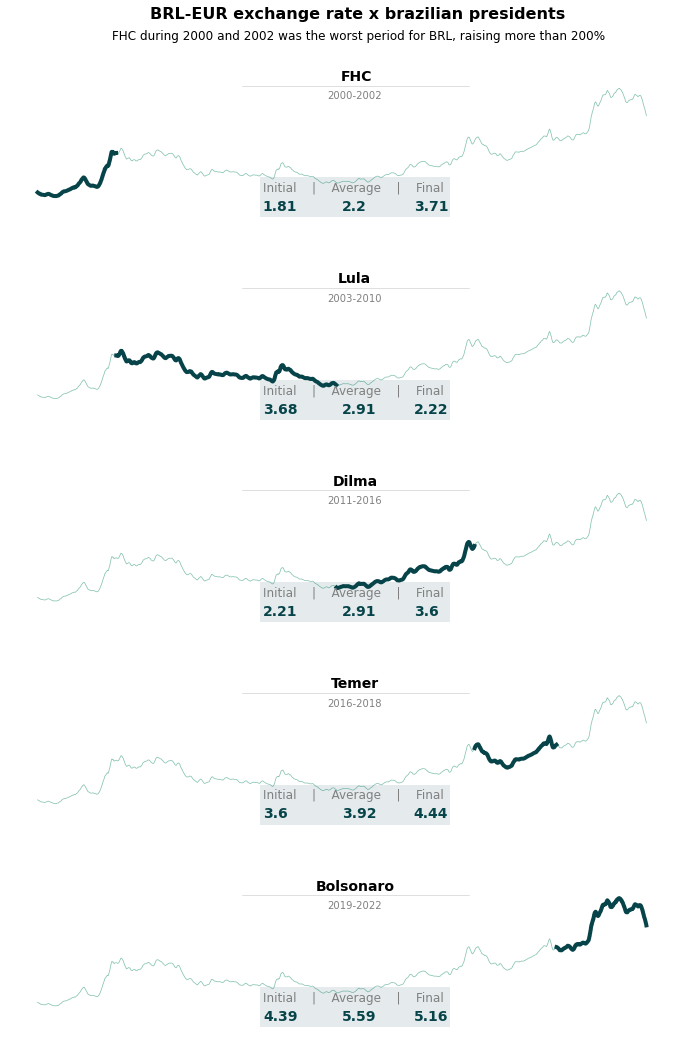

In [9]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, figsize=(12,18))
axes = [ax1, ax2, ax3, ax4, ax5]
for ax in axes:
    ax.plot(euro_to_real['time'],euro_to_real['rolling_mean'], color='#0d8767', alpha=0.5, linewidth=0.75)
    ax.set_ylim([0,8])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(bottom=0,left=0)
    for location in ['left','right','top','bottom']:
        ax.spines[location].set_visible(False)

ax1.plot(euro_to_real.loc[euro_to_real['president'] == 'FHC','time'],
         euro_to_real.loc[euro_to_real['president'] == 'FHC','rolling_mean'],
         color='#07444a', linewidth=4)
ax1.text(15030,7.08,'FHC',weight='bold',size=14)
ax1.axhline(y=6.85, xmin=0.35, xmax=0.69, linewidth=0.5, color='grey',alpha=0.5)
ax1.text(14850,6.2,'2000-2002',size=10, color='grey')
ax1.text(14000,1.8,'Initial    |    Average    |    Final', size=12, color='grey')
ax1.text(14000,0.9,FHC_ini, size=14,weight='bold', color='#07444a')
ax1.text(15050,0.9,FHC_avg, size=14,weight='bold', color='#07444a')
ax1.text(16000,0.9,FHC_end, size=14,weight='bold', color='#07444a')
ax1.axhline(y=1.55, xmin=0.407, xmax=0.632, linewidth=40, color='#07444a',alpha=0.1)

ax2.plot(euro_to_real.loc[euro_to_real['president'] == 'Lula','time'],
         euro_to_real.loc[euro_to_real['president'] == 'Lula','rolling_mean'],
         color='#07444a', linewidth=4)
ax2.text(15000,7.08,'Lula',weight='bold',size=14)
ax2.axhline(y=6.85, xmin=0.35, xmax=0.69, linewidth=0.5, color='grey',alpha=0.5)
ax2.text(14850,6.2,'2003-2010',size=10, color='grey')
ax2.text(14000,1.8,'Initial    |    Average    |    Final', size=12, color='grey')
ax2.text(14000,0.9,Lula_ini, size=14,weight='bold', color='#07444a')
ax2.text(15050,0.9,Lula_avg, size=14,weight='bold', color='#07444a')
ax2.text(16000,0.9,Lula_end, size=14,weight='bold', color='#07444a')
ax2.axhline(y=1.55, xmin=0.407, xmax=0.632, linewidth=40, color='#07444a',alpha=0.1)

ax3.plot(euro_to_real.loc[euro_to_real['president'] == 'Dilma','time'],
         euro_to_real.loc[euro_to_real['president'] == 'Dilma','rolling_mean'],
         color='#07444a', linewidth=4)
ax3.text(14930,7.08,'Dilma',weight='bold',size=14)
ax3.axhline(y=6.85, xmin=0.35, xmax=0.69, linewidth=0.5, color='grey',alpha=0.5)
ax3.text(14850,6.2,'2011-2016',size=10, color='grey')
ax3.text(14000,1.8,'Initial    |    Average    |    Final', size=12, color='grey')
ax3.text(14000,0.9,Dilma_ini, size=14,weight='bold', color='#07444a')
ax3.text(15050,0.9,Dilma_avg, size=14,weight='bold', color='#07444a')
ax3.text(16000,0.9,Dilma_end, size=14,weight='bold', color='#07444a')
ax3.axhline(y=1.55, xmin=0.407, xmax=0.632, linewidth=40, color='#07444a',alpha=0.1)

ax4.plot(euro_to_real.loc[euro_to_real['president'] == 'Temer','time'],
         euro_to_real.loc[euro_to_real['president'] == 'Temer','rolling_mean'],
         color='#07444a', linewidth=4)
ax4.text(14900,7.08,'Temer',weight='bold',size=14)
ax4.axhline(y=6.85, xmin=0.35, xmax=0.69, linewidth=0.5, color='grey',alpha=0.5)
ax4.text(14850,6.2,'2016-2018',size=10, color='grey')
ax4.text(14000,1.8,'Initial    |    Average    |    Final', size=12, color='grey')
ax4.text(14000,0.9,Temer_ini, size=14,weight='bold', color='#07444a')
ax4.text(15050,0.9,Temer_avg, size=14,weight='bold', color='#07444a')
ax4.text(16000,0.9,Temer_end, size=14,weight='bold', color='#07444a')
ax4.axhline(y=1.55, xmin=0.407, xmax=0.632, linewidth=40, color='#07444a',alpha=0.1)

ax5.plot(euro_to_real.loc[euro_to_real['president'] == 'Bolsonaro','time'],
         euro_to_real.loc[euro_to_real['president'] == 'Bolsonaro','rolling_mean'],
         color='#07444a', linewidth=4)
ax5.text(14700,7.08,'Bolsonaro',weight='bold',size=14)
ax5.axhline(y=6.85, xmin=0.35, xmax=0.69, linewidth=0.5, color='grey',alpha=0.5)
ax5.text(14850,6.2,'2019-2022',size=10, color='grey')
ax5.text(14000,1.8,'Initial    |    Average    |    Final', size=12, color='grey')
ax5.text(14000,0.9,Bolsonaro_ini, size=14,weight='bold', color='#07444a')
ax5.text(15050,0.9,Bolsonaro_avg, size=14,weight='bold', color='#07444a')
ax5.text(16000,0.9,Bolsonaro_end, size=14,weight='bold', color='#07444a')
ax5.axhline(y=1.55, xmin=0.407, xmax=0.632, linewidth=40, color='#07444a',alpha=0.1)

ax1.text(12500,10,'BRL-EUR exchange rate x brazilian presidents',weight='bold',size=16)
ax1.text(12000,9,'FHC during 2000 and 2002 was the worst period for BRL, raising more than 200%',size=12)

plt.show()